In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as statistics

In [2]:
insurance_data = pd.read_csv("insurance.txt", delimiter=',')

In [3]:
insurance_data

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [4]:
norm_insu_data = ((insurance_data-insurance_data.mean())/(insurance_data.std()))
norm_insu_data.insert(0, 'x0', 1) #x0 is appeneded to allow for the zeroth order term

In [5]:
#normalised data frame

norm_insu_data

,x0,age,bmi,children,charges
0,1,-1.438227,-0.453151,-0.908274,0.298472
1,1,-1.509401,0.509431,-0.078738,-0.953333
2,1,-0.797655,0.383164,1.580335,-0.728402
3,1,-0.441782,-1.305043,-0.908274,0.719574
4,1,-0.512957,-0.292447,-0.908274,-0.776512
...,...,...,...,...,...
1333,1,0.768185,0.050278,1.580335,-0.220468
1334,1,-1.509401,0.206062,-0.908274,-0.913661
1335,1,-1.509401,1.014499,-0.908274,-0.961237
1336,1,-1.295877,-0.797515,-0.908274,-0.930014


In [6]:
#creating a list of 20 data_frames that have been shuffled

dataset_list=list()
dataset_list.append(norm_insu_data.sample(frac=1))
for i in range(1,20):
    dataset_list.append(dataset_list[-1].sample(frac=1))


In [7]:
# Splitting the datasets into testing and training

training_data_list = [None]*20
testing_data_list = [None]*20

for i in range(20):
    training_data_list[i] = dataset_list[i].sample(frac=0.7)
    testing_data_list[i] = dataset_list[i].drop(training_data_list[i].index)

In [8]:
# Normal equation method to find regression model

indep_attrs = ["x0", "age", "bmi", "children"]
dep_attr = ["charges"]

testing_err_norm = []
training_err_norm = []
final_theta_ne=[]
for i in range(20):
    
    #Calculating the weights
    X_train = training_data_list[i][indep_attrs].to_numpy() 
    Y_train = training_data_list[i][dep_attr].to_numpy()
    XT_train = X_train.transpose()

    X_test = testing_data_list[i][indep_attrs].to_numpy() 
    Y_test = testing_data_list[i][dep_attr].to_numpy()
    theta = np.matmul(np.linalg.inv(np.matmul(XT_train,X_train)),np.matmul(XT_train,Y_train))
    final_theta_ne.append(theta)
    
    #Calculating RMSE for training data
    diff_train = np.subtract(np.matmul(X_train, theta), Y_train)
    diffT_train = diff_train.transpose()
    sumsq_train = np.matmul(diffT_train, diff_train)[0][0]
    rmse_train = np.sqrt(sumsq_train/(Y_train.shape[0]))
    training_err_norm.append(rmse_train)
    
    #Calculating RMSE for testing data

    diff_test = np.subtract(np.matmul(X_test, theta), Y_test)
    diffT_test = diff_test.transpose()
    sumsq_test = np.matmul(diffT_test, diff_test)[0][0]
    rmse_test = np.sqrt(sumsq_test/(Y_test.shape[0]))
    testing_err_norm.append(rmse_test)

In [9]:
#final theta after applying NE
bias_ne=[]
bias_ne.append("Bias")
age_ne=[]
age_ne.append("Age")
bmi_ne=[]
bmi_ne.append("BMI")
children_ne=[]
children_ne.append("Children")
print("FINAL THETA OF 20 MODELS AFTER APPLYING NE:-")    
for x in range(20): 
            bias_ne.append(final_theta_ne[x][0]) 
            age_ne.append(final_theta_ne[x][1])
            bmi_ne.append(final_theta_ne[x][2]) 
            children_ne.append(final_theta_ne[x][3])
            
    
for c1, c2, c3, c4 in zip(bias_ne, age_ne, bmi_ne, children_ne):
        print ("%-20s %-20s %-20s %s" % (c1, c2, c3, c4))    

FINAL THETA OF 20 MODELS AFTER APPLYING NE:-
Bias                 Age                  BMI                  Children
[0.01068258]         [0.27681082]         [0.16777981]         [0.04802324]
[-0.01395451]        [0.25768312]         [0.16387524]         [0.03462622]
[0.0061338]          [0.26691226]         [0.18636078]         [0.04282332]
[0.01799552]         [0.277476]           [0.16451233]         [0.0284647]
[-0.01583684]        [0.29109844]         [0.11148274]         [0.07004933]
[0.01560465]         [0.26161433]         [0.16848545]         [0.0591869]
[-0.0270719]         [0.26111024]         [0.15210488]         [0.0459622]
[0.00572227]         [0.26670725]         [0.19220795]         [0.06536485]
[-0.00276644]        [0.28625826]         [0.19093804]         [0.0791811]
[0.01089533]         [0.28988722]         [0.18725603]         [0.05248408]
[0.00507594]         [0.24968155]         [0.18697169]         [0.05778519]
[-0.01716308]        [0.28419467]         [0.162945

In [10]:
#GRADIENT DESCENT FUNCTION DEFINITION
def gradient_descent(x, y, iterations, eta, x_test, y_test, precis):
    
    theta = np.random.rand(x.shape[1],1)
    m = y.shape[0]
    n = y_test.shape[0]
    past_costs_train = []
    past_costs_test= []
    past_rmse_train= []
    past_rmse_test= []
    for i in range(iterations):
        
        prediction_train = np.dot(x, theta)
        error_train = prediction_train - y
        cost_train = 1/(2*m) * np.dot(error_train.T, error_train)
        past_costs_train.append(cost_train[0][0])
        rmse_train = np.sqrt((2*(cost_train[0][0])))
        past_rmse_train.append(rmse_train)
        theta = theta - (eta * (1/m) * np.dot(x.T, error_train))
        
        prediction_test = np.dot(x_test, theta)
        error_test = prediction_test - y_test
        cost_test = 1/(2*n) * np.dot(error_test.T, error_test)
        past_costs_test.append(cost_test[0][0])
        rmse_test = np.sqrt((2*cost_test[0][0]))
        past_rmse_test.append(rmse_test)
        
        if((len(past_costs_train) > 1) and abs(past_costs_train[-2]-past_costs_train[-1]) <= precis):
            break
            
    return theta, past_costs_train, past_costs_test, past_rmse_train, past_rmse_test


In [11]:
# GRADIENT DESCENT IMPLEMENTATION ON 20 MODELS
past_rmse_train_grad_desc = [None]*20
past_rmse_test_grad_desc = [None]*20
past_costs_train_gd = [None]*20
past_costs_test_gd = [None]*20
final_theta_gd = [None]*20
precision = 0.000001
eta = 0.001
iterations = 5000
for i in range(20):
    
    X_train = training_data_list[i][indep_attrs].to_numpy() 
    Y_train = training_data_list[i][dep_attr].to_numpy()
    
    X_test = testing_data_list[i][indep_attrs].to_numpy() 
    Y_test = testing_data_list[i][dep_attr].to_numpy()
    
    final_theta_gd[i], past_costs_train_gd[i], past_costs_test_gd[i], past_rmse_train_grad_desc[i], past_rmse_test_grad_desc[i] = gradient_descent(X_train, Y_train, iterations, eta, X_test, Y_test, precision)
    
    #printing error values for learning rate=0.01 , 20 models.
    training_gd=[]
    training_gd.append("Training")
    testing_gd=[]
    testing_gd.append("Testing")
    
    print ("Error values (every 500th iteration) for model number",i+1,":-\n")
    for x in range(len(past_rmse_train_grad_desc[i])): 
        if x%500==0:
            training_gd.append(past_rmse_train_grad_desc[i][x]) 
            testing_gd.append(past_rmse_test_grad_desc[i][x])
    
    for c1, c2 in zip(training_gd, testing_gd):
        print ("%-40s %s" % (c1, c2))         
    print("\n")

Error values (every 500th iteration) for model number 1 :-

Training                                 Testing
1.0993665605900307                       1.0827400502133313
1.0025688731751365                       0.9800287768359787
0.9667116149825022                       0.940611313387991
0.9539173538361182                       0.9257706873911083
0.9494121673979882                       0.9200818585615245
0.9478306235323316                       0.9178029850434921


Error values (every 500th iteration) for model number 2 :-

Training                                 Testing
1.5592605799163168                       1.5526389511590426
1.1963670099342474                       1.2128983853118531
1.0304122977846608                       1.0669286487808778
0.9613232801550063                       1.0114497806699971
0.9340771060123647                       0.9923774005129478
0.9235612395406193                       0.9865542331045665
0.9195202118323053                       0.985181883610462
0.

Error values (every 500th iteration) for model number 19 :-

Training                                 Testing
1.3759809001463292                       1.3832535683161824
1.1078745399911432                       1.127475509548285
0.9968275823874797                       1.0221842928294362
0.9544015840979947                       0.9821545970194507
0.9387752065023384                       0.96750732474729
0.933078954209206                        0.9622273401603859
0.9310006520844017                       0.9603332788603713


Error values (every 500th iteration) for model number 20 :-

Training                                 Testing
1.459561530549116                        1.4262474247489751
1.1588368583119502                       1.1372435779362986
1.0274132067500166                       1.0111527690318698
0.9746077784428261                       0.9605774304681755
0.9542633176360326                       0.941132494805707
0.9465287577344909                       0.9337514556876084
0.

In [12]:
#final theta after applying GD
bias_gd=[]
bias_gd.append("Bias")
age_gd=[]
age_gd.append("Age")
bmi_gd=[]
bmi_gd.append("BMI")
children_gd=[]
children_gd.append("Children")
print("FINAL THETA OF 20 MODELS AFTER APPLYING GD:-")    
for x in range(20): 
            bias_gd.append(final_theta_gd[x][0]) 
            age_gd.append(final_theta_gd[x][1])
            bmi_gd.append(final_theta_gd[x][2]) 
            children_gd.append(final_theta_gd[x][3])
            
    
for c1, c2, c3, c4 in zip(bias_gd, age_gd, bmi_gd, children_gd):
        print ("%-20s %-20s %-20s %s" % (c1, c2, c3, c4))         


FINAL THETA OF 20 MODELS AFTER APPLYING GD:-
Bias                 Age                  BMI                  Children
[0.03511838]         [0.29121674]         [0.17816362]         [0.05049973]
[0.00300014]         [0.24576703]         [0.18502126]         [0.05095267]
[0.01467357]         [0.25316176]         [0.21031147]         [0.0582839]
[0.01879547]         [0.29338189]         [0.17371506]         [0.05085547]
[-0.00531118]        [0.30280883]         [0.13495953]         [0.07750419]
[0.03085914]         [0.24856635]         [0.18391671]         [0.08109803]
[-0.007209]          [0.25695204]         [0.15130638]         [0.06995848]
[0.02031952]         [0.29285934]         [0.19660564]         [0.0678554]
[0.02217479]         [0.30552842]         [0.18487273]         [0.07273385]
[0.03029157]         [0.28721694]         [0.20649373]         [0.07033048]
[0.02623572]         [0.23838499]         [0.18795335]         [0.07993764]
[0.01049011]         [0.2734016]          [0.1642

Model number  1 :


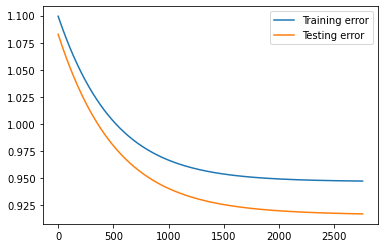

Model number  2 :


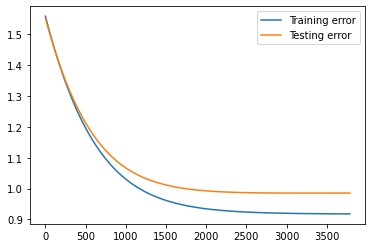

Model number  3 :


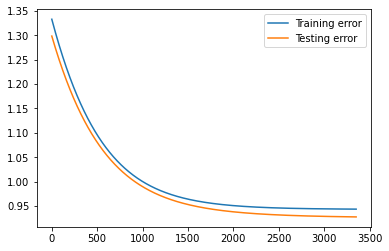

Model number  4 :


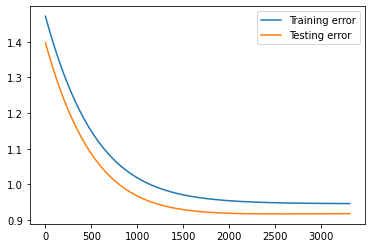

Model number  5 :


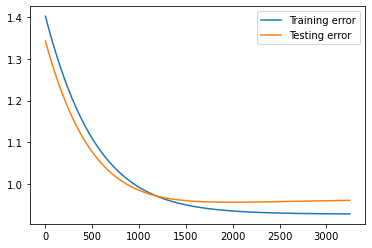

Model number  6 :


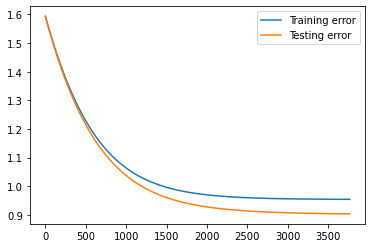

Model number  7 :


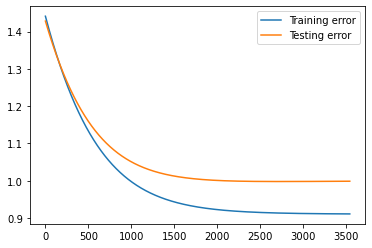

Model number  8 :


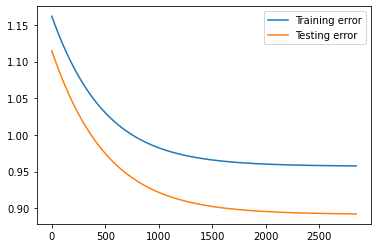

Model number  9 :


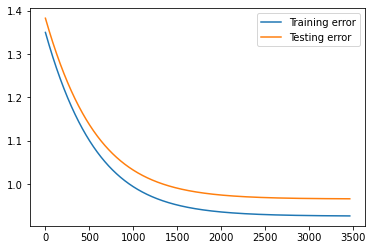

Model number  10 :


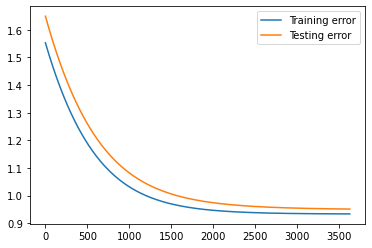

Model number  11 :


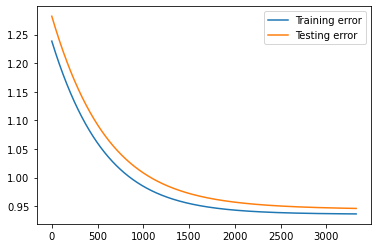

Model number  12 :


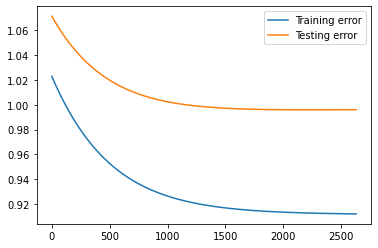

Model number  13 :


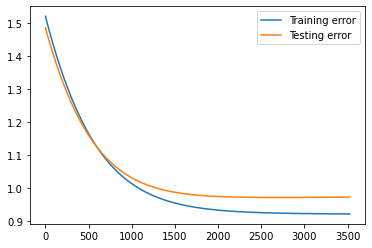

Model number  14 :


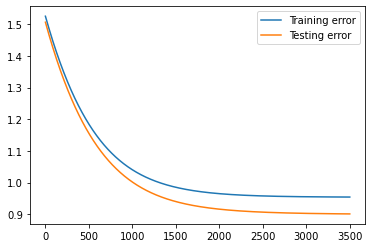

Model number  15 :


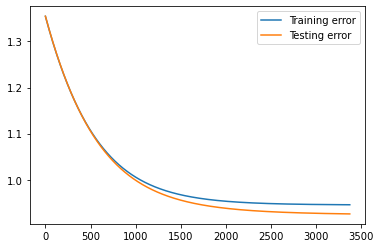

Model number  16 :


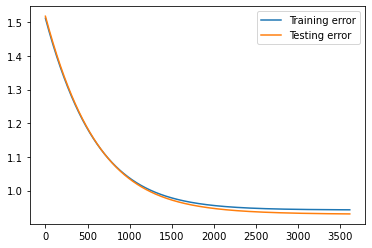

Model number  17 :


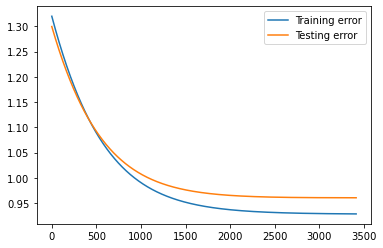

Model number  18 :


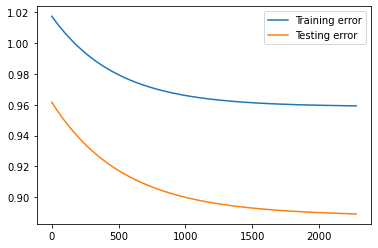

Model number  19 :


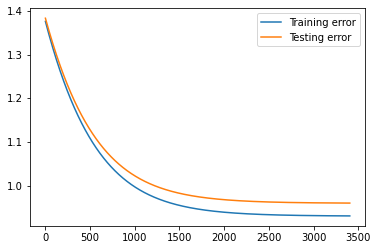

Model number  20 :


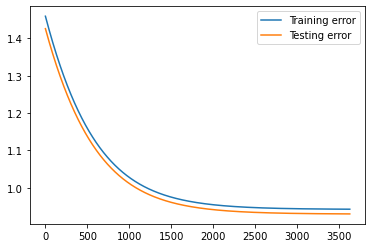

In [13]:
# Plotting training VS testing error for all 20 models for GD
for x in range(20):
    plt.figure()
    print("Model number ",x+1,":")
    plt.plot(past_rmse_train_grad_desc[x], label="Training error")
    plt.plot(past_rmse_test_grad_desc[x], label="Testing error")
    plt.legend()
    plt.show()

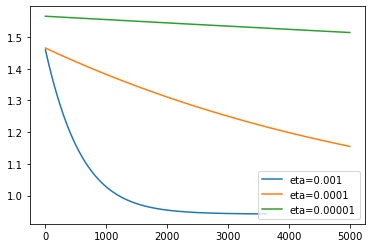

In [14]:
#Now using 20th model to compare effect of learning rate on GD

X_train = training_data_list[19][indep_attrs].to_numpy() 
Y_train = training_data_list[19][dep_attr].to_numpy()
    
X_test = testing_data_list[19][indep_attrs].to_numpy() 
Y_test = testing_data_list[19][dep_attr].to_numpy()

precision = 0.000001
eta2=0.0001
eta3=0.00001

final_theta2_gd, past_costs_train2, past_costs_test2, past_rmse_train_grad_desc2, past_rmse_test_grad_desc3 = gradient_descent(X_train, Y_train, iterations, eta2, X_test, Y_test, precision)
final_theta3_gd, past_costs_train3, past_costs_test3, past_rmse_train_grad_desc3, past_rmse_test_grad_desc3 = gradient_descent(X_train, Y_train, iterations, eta3, X_test, Y_test, precision)


plt.plot(past_rmse_train_grad_desc[19], label="eta=0.001")
plt.plot(past_rmse_train_grad_desc2, label="eta=0.0001")
plt.plot(past_rmse_train_grad_desc3, label="eta=0.00001")
plt.legend()


In [15]:
# STOCHASTIC GRADIENT DESCENT FUNCTION DEFINITION

def stoch_grad(x, y, iterations, eta, x_test, y_test, precis):
    theta = np.random.rand(x.shape[1],1)
    m = y.shape[0]
    n = y_test.shape[0]
    past_costs_train = []
    past_costs_test= []
    past_rmse_train= []
    past_rmse_test= []
    for i in range(iterations):
        p = np.random.permutation(len(x))
        x=x[p] 
        y=y[p]
        mse = 0
        for j in range(x.shape[0]):
            row_j = np.matrix(x[j])
            prediction = np.matmul(row_j, theta)
            xT = row_j.transpose()
            diff = prediction - np.matrix(y[j])
            theta = theta - eta*np.matmul(xT, diff)
        
        diff_train = np.matmul(x, theta)-y
        cost_train = (1/(2*m))*(np.matmul(diff_train.T, diff_train))
        cost_train_val = np.array(cost_train)[0][0]
        past_costs_train.append(cost_train_val)
        past_rmse_train.append(np.sqrt(2*cost_train_val))
        
        diff_test = np.matmul(x_test,theta) - y_test
        mse_test = (1/(2*n))*(np.matmul(diff_test.T, diff_test))
        mse_test_val = np.array(mse_test)[0][0]
        past_costs_test.append(mse_test_val)
        past_rmse_test.append(np.sqrt(2*mse_test_val))
        if((len(past_costs_train) > 1) and abs(past_costs_train[-2]-past_costs_train[-1]) <= precis):
            break
    return theta, past_costs_train, past_costs_test, past_rmse_train, past_rmse_test   

            

In [16]:
# STOCHASTIC GRADIENT DESCENT IMPLEMENTATION ON 20 MODELS
past_rmse_train_sgd = [None]*20
past_rmse_test_sgd = [None]*20
past_costs_train_sgd = [None]*20
past_costs_test_sgd = [None]*20
final_theta_sgd = [None]*20
precision = 0.000001
eta = 0.001
iterations = 400
for i in range(20):
    
    X_train = training_data_list[i][indep_attrs].to_numpy() 
    Y_train = training_data_list[i][dep_attr].to_numpy()
    
    X_test = testing_data_list[i][indep_attrs].to_numpy() 
    Y_test = testing_data_list[i][dep_attr].to_numpy()
    
    final_theta_sgd[i], past_costs_train_sgd[i], past_costs_test_sgd[i], past_rmse_train_sgd[i], past_rmse_test_sgd[i] = stoch_grad(X_train, Y_train, iterations, eta, X_test, Y_test, precision)
    
    #printing error values for learning rate=0.01 , 20 models.
    #printing error values for learning rate=0.01 , 20 models.
    training_sgd=[]
    training_sgd.append("Training")
    testing_sgd=[]
    testing_sgd.append("Testing")
    
    print ("Error values (every 50th iteration) for model number",i+1,":-\n")
    for x in range(len(past_rmse_train_sgd[i])): 
        if x%50==0:
            training_sgd.append(past_rmse_train_sgd[i][x]) 
            testing_sgd.append(past_rmse_test_sgd[i][x])
    
    for c1, c2 in zip(training_sgd, testing_sgd):
        print ("%-40s %s" % (c1, c2))         
    print("\n")


Error values (every 50th iteration) for model number 1 :-

Training                                 Testing
1.030034905970274                        0.9972823260176454
0.9469989338590346                       0.9159620949135591


Error values (every 50th iteration) for model number 2 :-

Training                                 Testing
0.998033323354254                        1.032404553756296
0.9170289176313543                       0.9864656710128613


Error values (every 50th iteration) for model number 3 :-

Training                                 Testing
1.020053361315648                        0.9940230283332696


Error values (every 50th iteration) for model number 4 :-

Training                                 Testing
0.9953346603342466                       0.942654209608073


Error values (every 50th iteration) for model number 5 :-

Training                                 Testing
0.9570972085754107                       0.9837739221353556


Error values (every 50th iterati

In [17]:
#final theta after applying SGD
bias_sgd=[]
bias_sgd.append("Bias")
age_sgd=[]
age_sgd.append("Age")
bmi_sgd=[]
bmi_sgd.append("BMI")
children_sgd=[]
children_sgd.append("Children")
print("FINAL THETA OF 20 MODELS AFTER APPLYING SGD:-")    
for x in range(20): 
            bias_sgd.append(final_theta_sgd[x][0]) 
            age_sgd.append(final_theta_sgd[x][1])
            bmi_sgd.append(final_theta_sgd[x][2]) 
            children_sgd.append(final_theta_sgd[x][3])
            
    
for c1, c2, c3, c4 in zip(bias_sgd, age_sgd, bmi_sgd, children_sgd):
        print ("%-20s %-20s %-20s %s" % (c1, c2, c3, c4))    

FINAL THETA OF 20 MODELS AFTER APPLYING SGD:-
Bias                 Age                  BMI                  Children
[[0.01451597]]       [[0.27504533]]       [[0.16647389]]       [[0.05197556]]
[[-0.00971999]]      [[0.26413378]]       [[0.15921121]]       [[0.04285565]]
[[0.00873615]]       [[0.2611281]]        [[0.19314937]]       [[0.03656928]]
[[0.01307687]]       [[0.27681292]]       [[0.15791727]]       [[0.03133343]]
[[-0.01759369]]      [[0.28631827]]       [[0.10670011]]       [[0.06840735]]
[[0.01681457]]       [[0.26015278]]       [[0.17297891]]       [[0.06080929]]
[[-0.02523207]]      [[0.26968083]]       [[0.15408954]]       [[0.04828869]]
[[-0.00079612]]      [[0.2675026]]        [[0.19112651]]       [[0.06141855]]
[[0.00413089]]       [[0.28358405]]       [[0.19035226]]       [[0.07371314]]
[[0.01341322]]       [[0.28959546]]       [[0.18332001]]       [[0.05617123]]
[[0.00756452]]       [[0.25304647]]       [[0.1807846]]        [[0.0649413]]
[[-0.01258109]]      [[0.

Model number  1 :


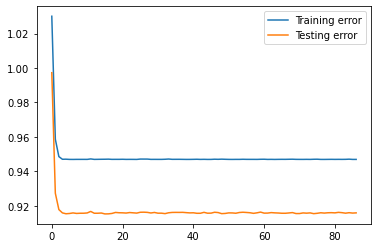

Model number  2 :


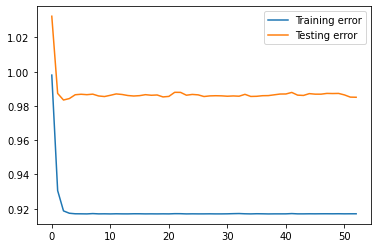

Model number  3 :


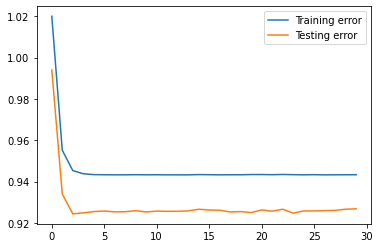

Model number  4 :


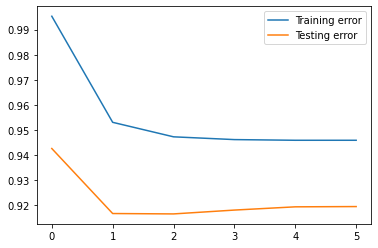

Model number  5 :


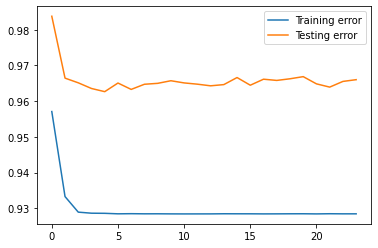

Model number  6 :


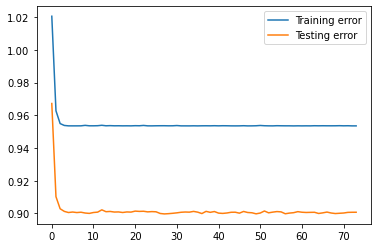

Model number  7 :


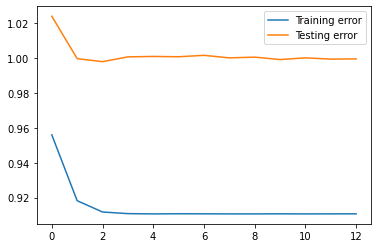

Model number  8 :


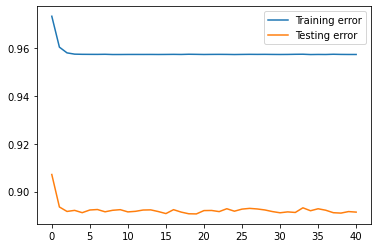

Model number  9 :


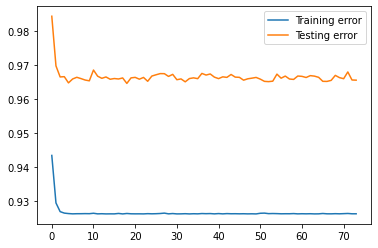

Model number  10 :


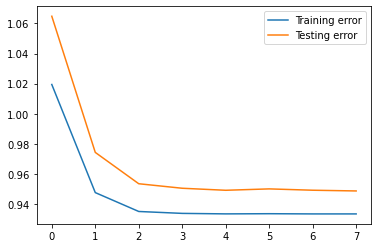

Model number  11 :


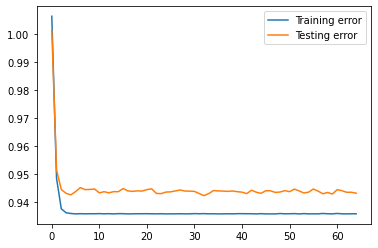

Model number  12 :


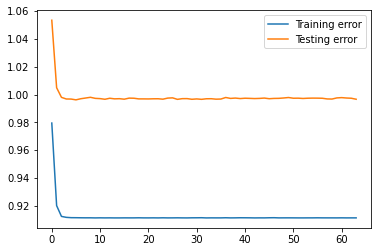

Model number  13 :


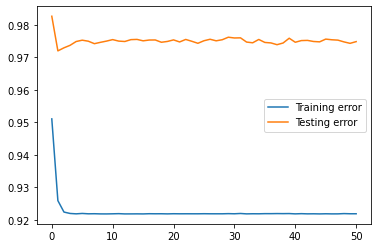

Model number  14 :


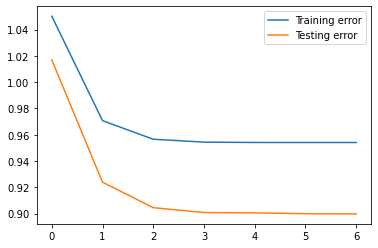

Model number  15 :


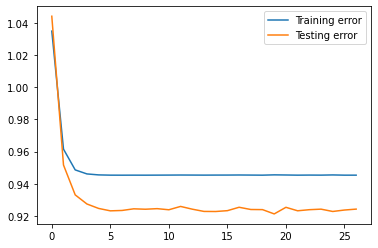

Model number  16 :


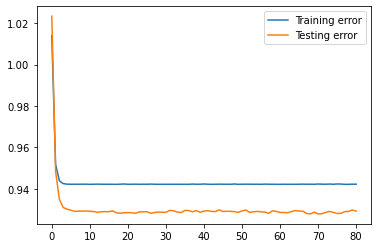

Model number  17 :


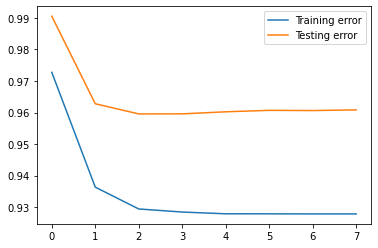

Model number  18 :


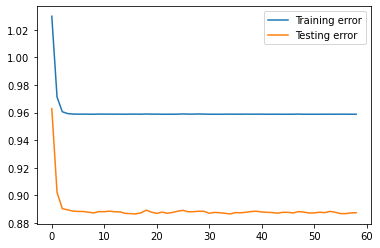

Model number  19 :


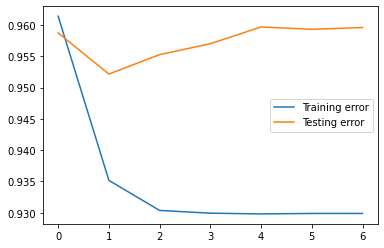

Model number  20 :


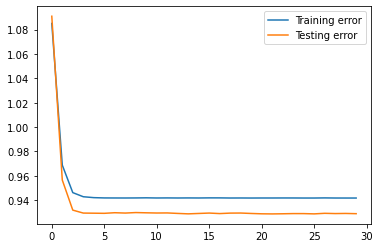

In [18]:
# Plotting training VS testing error for all 20 models for SGD
for x in range(20):
    
    plt.figure()
    print("Model number ",x+1,":")
    plt.plot(past_rmse_train_sgd[x], label="Training error")
    plt.plot(past_rmse_test_sgd[x], label="Testing error")
    plt.legend()
    plt.show()

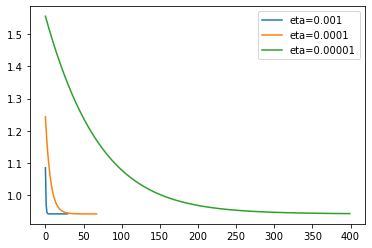

In [19]:
#Now using 20th model to compare effect of learning rate on SGD

X_train = training_data_list[19][indep_attrs].to_numpy() 
Y_train = training_data_list[19][dep_attr].to_numpy()
    
X_test = testing_data_list[19][indep_attrs].to_numpy() 
Y_test = testing_data_list[19][dep_attr].to_numpy()

precision = 0.000001
eta2=0.0001
eta3=0.00001

final_theta2, past_costs_train2, past_costs_test2, past_rmse_train_sgd2, past_rmse_test_sgd3 = stoch_grad(X_train, Y_train, iterations, eta2, X_test, Y_test, precision)
final_theta3, past_costs_train3, past_costs_test3, past_rmse_train_sgd3, past_rmse_test_sgd3 = stoch_grad(X_train, Y_train, iterations, eta3, X_test, Y_test, precision)

plt.plot(past_rmse_train_sgd[19], label="eta=0.001")
plt.plot(past_rmse_train_sgd2, label="eta=0.0001")
plt.plot(past_rmse_train_sgd3, label="eta=0.00001")
plt.legend()

In [20]:
#Creating data frame to highlight min rmse across the models
min_rmse_train_table_gd=[None]*20
min_rmse_test_table_gd=[None]*20
min_rmse_train_table_sgd=[None]*20
min_rmse_test_table_sgd=[None]*20
for x in range(20):
    min_rmse_train_table_gd[x]=past_rmse_train_grad_desc[x][len(past_rmse_train_grad_desc[x])-1]
    min_rmse_test_table_gd[x]=past_rmse_test_grad_desc[x][len(past_rmse_test_grad_desc[x])-1]
    min_rmse_train_table_sgd[x]=past_rmse_train_sgd[x][len(past_rmse_train_sgd[x])-1]
    min_rmse_test_table_sgd[x]=past_rmse_test_sgd[x][len(past_rmse_test_sgd[x])-1]

df = pd.DataFrame(list(zip(training_err_norm , min_rmse_train_table_gd, min_rmse_train_table_sgd, testing_err_norm ,  min_rmse_test_table_gd, min_rmse_test_table_sgd)), 
     index =['1', '2', '3', '4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'], columns =['NE train', 'GD train' , 'SGD train' , 'NE test', 'GD test' , 'SGD test']) 
df

,NE train,GD train,SGD train,NE test,GD test,SGD test
1,0.946972,0.947478,0.946991,0.915880,0.917212,0.915972
2,0.916970,0.917550,0.917052,0.986177,0.985286,0.985094
3,0.943209,0.943755,0.943275,0.925749,0.927809,0.926761
4,0.945896,0.946380,0.945936,0.919993,0.918205,0.919530
5,0.928433,0.928929,0.928463,0.965205,0.961417,0.966016
6,0.953532,0.954084,0.953545,0.900559,0.903164,0.900750
7,0.910571,0.911116,0.910619,1.000495,0.998769,0.999643
8,0.957266,0.957764,0.957298,0.891836,0.892347,0.891442
9,0.926203,0.926760,0.926249,0.966272,0.966248,0.965611
10,0.933386,0.933937,0.933404,0.948872,0.951477,0.948670


In [21]:
#Trying to compare the algorithms
wins_NE_train=0
wins_GD_train=0
wins_SGD_train=0
wins_NE_test=0
wins_GD_test=0
wins_SGD_test=0
for x in range(20):
    if(training_err_norm[x]<min(min_rmse_train_table_gd[x],min_rmse_train_table_sgd[x])):
        wins_NE_train+=1
    elif(min_rmse_train_table_gd[x]<min(training_err_norm[x],min_rmse_train_table_sgd[x])):
        wins_GD_train+=1
    else:
        wins_SGD_train+=1
            
    if(testing_err_norm[x]<min(min_rmse_test_table_gd[x],min_rmse_test_table_sgd[x])):
        wins_NE_test+=1
            
    elif(min_rmse_test_table_gd[x]<min(testing_err_norm[x],min_rmse_test_table_sgd[x])):
        wins_GD_test+=1
    else:
        wins_SGD_test+=1        

wins = {'Number of training minimums ':[wins_NE_train, wins_GD_train, wins_SGD_train], 'Number of testing minimums':[wins_NE_test, wins_GD_test, wins_SGD_test]}
df = pd.DataFrame(wins,index=['NE','GD','SGD'])
df

,Number of training minimums,Number of testing minimums
NE,20,7
GD,0,6
SGD,0,7


In [22]:
#Printing the training mean and variance as well as the testing mean and variance across the 3 algorithms
mean_NE_train=statistics.mean(training_err_norm)
variance_NE_train=statistics.variance(training_err_norm)
mean_GD_train=statistics.mean(min_rmse_train_table_gd)
variance_GD_train=statistics.variance(min_rmse_train_table_gd)
mean_SGD_train=statistics.mean(min_rmse_train_table_sgd)
variance_SGD_train=statistics.variance(min_rmse_train_table_sgd)

mean_NE_test=statistics.mean(testing_err_norm)
variance_NE_test=statistics.variance(testing_err_norm)
mean_GD_test=statistics.mean(min_rmse_test_table_gd)
variance_GD_test=statistics.variance(min_rmse_test_table_gd)
mean_SGD_test=statistics.mean(min_rmse_test_table_sgd)
variance_SGD_test=statistics.variance(min_rmse_test_table_sgd)

error_stats = {'Training mean error':[mean_NE_train, mean_GD_train, mean_SGD_train], 'Testing mean error':[mean_NE_test, mean_GD_test, mean_SGD_test]}
df = pd.DataFrame(error_stats,index=['NE','GD','SGD'])
display(df) 

error_stats = {'Training variance error':[variance_NE_train, variance_GD_train, variance_SGD_train], 'Testing variance error':[variance_NE_test, variance_GD_test, variance_SGD_test]}
df = pd.DataFrame(error_stats,index=['NE','GD','SGD'])
display(df) 

,Training mean error,Testing mean error
NE,0.936561,0.941258
GD,0.937095,0.941690
SGD,0.936602,0.941204


,Training variance error,Testing variance error
NE,0.000216,0.001181
GD,0.000216,0.001109
SGD,0.000216,0.001167
